In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import requests

sanFranData= pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
seattleData= pd.read_csv('seattle_incidents_summer_2014.csv')

c:\users\ramy.zulficar\appdata\local\enthought\canopy\user\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


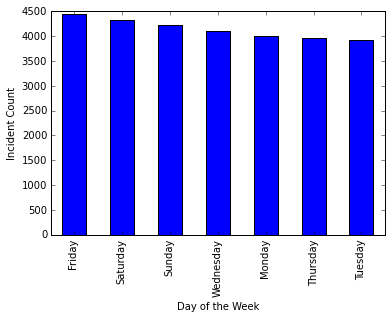

0        08


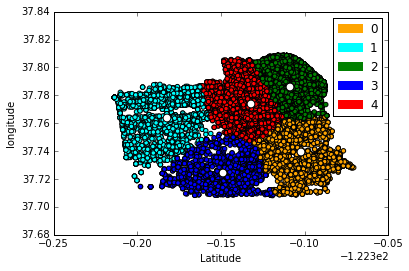

In [63]:
import matplotlib.patches as mpatches

clusterAlgo= KMeans(n_clusters=5)
x= clusterAlgo.fit_predict(zip(sanFranData.X.values, sanFranData.Y.values))
clusterCenters= clusterAlgo.cluster_centers_
sanFranData['locationCategory']= pd.Series(x)


sanFranData['Month']=[str(i).split('/')[0] for i in sanFranData['Date']]
xCenters= clusterCenters[:,:1]
yCenters= clusterCenters[:,1:]
#print categoryCount.DayOfWeek.value_counts().unstack().fillna(0)
categoryCount=sanFranData.groupby(['locationCategory','Category']).size().order()
counts=  categoryCount.unstack().T
#for i in counts.columns:
#    print counts[i]
#categoryCount[categoryCount['locationCategory']==1].DayOfWeek.value_counts().plot(kind='bar',stacked=True)


legendNames=range(5)
colorList=['orange','cyan','green','blue','red']
colors=[mpatches.Patch(color=colorList[g], label="Loca "+str(g)) for g in legendNames]
plt.scatter(sanFranData.X.values, sanFranData.Y.values, c=[colorList[i] for i in x])
plt.scatter(xCenters, yCenters, c='white',s=60)
plt.xlabel('Latitude')
plt.ylabel('longitude')
plt.legend(colors, range(5))



locationCategory
0     4865
1     2317
2    13031
3     2201
4     6579
dtype: float64


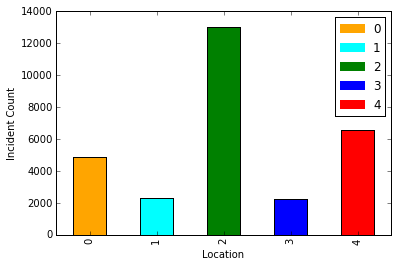

In [73]:
counts=  categoryCount.unstack().T
print counts.sum()
g=pd.DataFrame(counts.sum())
g['color']=colorList

g.plot(kind='bar',color=[g.color])
plt.legend(colors, range(5))
plt.xlabel("Location")
plt.ylabel("Incident Count")

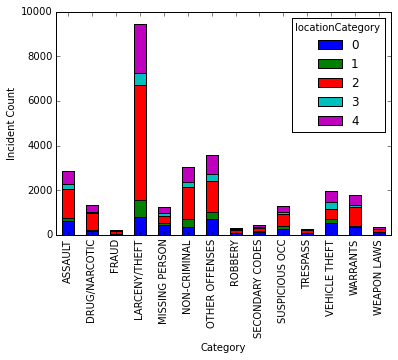

In [74]:
categoryCount.unstack().T[categoryCount.unstack().sum()>150].plot(kind='bar', stacked=True)
#categoryCount.unstack()[categoryCount.unstack().sum()>100].plot(kind='bar',stacked=True)
#print categoryCount.unstack().sum().order()[categoryCount.unstack().sum()>100]#.plot(kind='bar',stacked=True)
plt.ylabel("Incident Count")

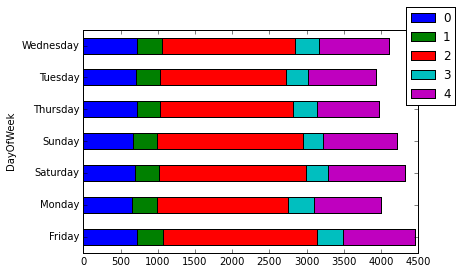

In [71]:
dayCount=sanFranData.groupby(['locationCategory','DayOfWeek']).size().order()
counts=  dayCount.unstack().T
dayCount.unstack().T.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel('Incident Count')

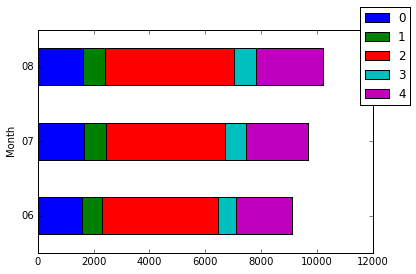

In [67]:
monthCount=sanFranData.groupby(['locationCategory','Month']).size().order()
#counts=monthCount.unstack().T
monthCount.unstack().T.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel('Incident Count')